### 2. Programación Lineal, método gráfico

In [1]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
import scipy
from scipy.optimize import linprog
import pandas as pd

$M_a = 3x_1 + x_2 \leq 8$

$M_b = x_1 + 4x_2 \leq 8$

$z = 50x_1 + 40x_2$

### Datos a trabajar

In [20]:
#Se definen valores de nuestra ecuación

A = np.array([[3, 1], [1, 4]])
b = np.array([8,8])
z = np.array([50, 40])

fma = "$M_a = 3x_1 + x_2 \leq 8$" #Función de fma
fmb = "$M_b = x_1 + 4x_2 \leq 8$" #Función de fmb
fz = "$z = 50x_1 + 40x_2$" #función de fz

## Inciso A

In [9]:
# Se sustituye MA en 0

def linear(a, b):
    return(b/a)
          
ma1 = np.array([linear(A[0,0], b[0]), 0])
ma2 = np.array([0, linear(A[0,1], b[0])])

print(ma1)
print(ma2)

[2.66666667 0.        ]
[0. 8.]


In [8]:
# ok se sustituye MB en 0
      
mb1 = np.array([linear(A[1,0], b[1]), 0])
mb2 = np.array([0, linear(A[1,1], b[1])])

print(mb1)
print(mb2)

[8. 0.]
[0. 2.]


In [10]:
# Resolver el sistema de ecuaciones
x = np.linalg.solve(A, b)
x

array([2.18181818, 1.45454545])

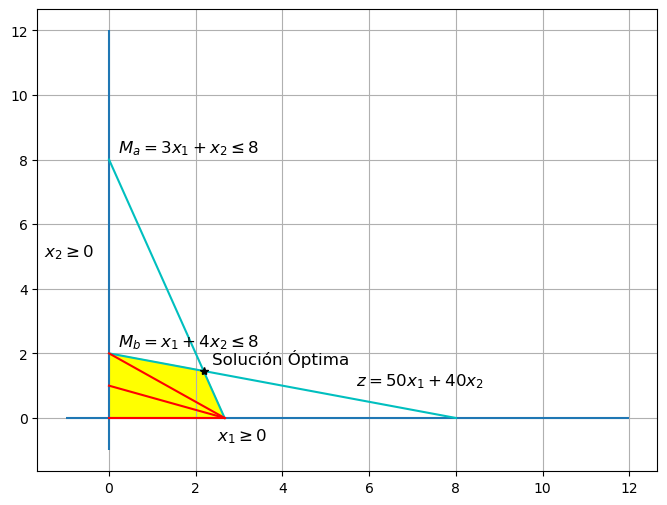

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()


# Dibujamos las restricciones
ax.hlines(0, -1, 12) #Se traza X
ax.vlines(0, -1, 12) #Se traza y
ax.plot(ma1, ma2, linestyle="-", color="c") #Se dibuja la linea de la función MA igualada a 0
ax.plot(mb1, mb2, color="c") #Se dibuja la linea de la función MB igualada a 0
ax.text((ma2[0] + .2), (ma2[1] + .2), fma, size=12) 
ax.text((mb2[0] + .2), (mb2[1] + .2), fmb, size=12)
ax.text(-1.5, 5, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Se ilumina el área de posibles soluciones
feasible_set = Polygon(np.array([[0, 0],
                                 [mb2[0], mb2[1]],
                                 [x[0], x[1]], 
                                 [ma1[0], ma1[1]]]), 
                       color="yellow")
ax.add_patch(feasible_set)

# Se dibujan trazan las posibles soluciones para cada 1 unidad
ax.plot(ma1, (0, 0), linestyle="-", color="red")
ax.plot(ma1, (0, 1), linestyle="-", color="red")
ax.plot(ma1, (0, 2), linestyle="-", color="red")
ax.text(5.7, 1, fz, size=12)
#ax.arrow(-1.6, 0, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="green")

# Dibujamos la solución optima
ax.plot(x[0], x[1], "*", color="black")
ax.text((x[0] + .2), (x[1] + .2), "Solución Óptima", size=12)

plt.show()

In [11]:
#Se calcula Z dentro de los puntos óptimos

def fun_z(a, b, c, d):
    return((a*b) + (c*d))

za = fun_z(mb2[0], z[0], mb2[1], z[1])
zb = fun_z(x[0], z[0], x[1], z[1])
zc = fun_z(ma1[0], z[0], ma1[1], z[1])

print(f"ZA = {za}") #Se sustituyen los valores óptimos del gráfico anterior en Y
print(f"ZB = {zb}") #Se sustituye la solución de la ecuación
print(f"ZC = {zc}") #Se sustituyen los valores óptimos del gráfico anterior en X

ZA = 80.0
ZB = 167.27272727272728
ZC = 133.33333333333331


### Inciso B

In [21]:
#Se incrementa en uno la restricción de MA dando como resultado MAN
#Se incrementa en uno la restricción de MB dando como resultado MBN

bn = np.array([9,8])
bn1 = np.array([8,9])

fman = "$M_{an} = 3x_1 + x_2 \leq 9$" #Función de MAN
fmbn = "$M_{bn} = x_1 + 4x_2\leq 9$" #Función de MB

In [22]:
# Se sustituye MAN en 0

man1 = np.array([linear(A[0,0], bn[0]), 0])
man2 = np.array([0, linear(A[0,1], bn[0])])

print(man1)
print(man2)

[3. 0.]
[0. 9.]


In [23]:
#Se resuelve el sistema de ecuaciones

x1 = np.linalg.solve(A, bn)
x1

array([2.54545455, 1.36363636])

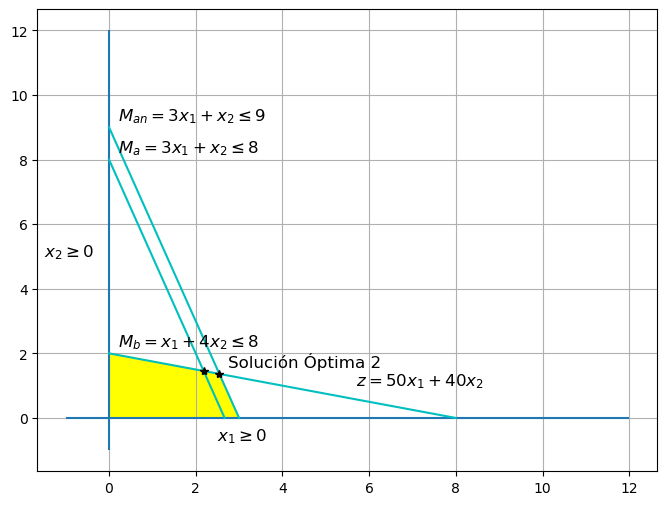

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()


# Dibujamos las restricciones
ax.hlines(0, -1, 12) #Se traza X
ax.vlines(0, -1, 12) #Se traza y
ax.plot(ma1, ma2, linestyle="-", color="c") #Se dibuja la linea de la función MA igualada a 0
ax.plot(man1, man2, linestyle="-", color="c") #Se dibuja la linea de la función MAN igualada a 0
ax.plot(mb1, mb2, color="c") #Se dibuja la linea de la función MB igualada a 0
ax.text((ma2[0] + .2), (ma2[1] + .2), fma, size=12)
ax.text((man2[0] + .2), (man2[1] + .2), fman, size=12) 
ax.text((mb2[0] + .2), (mb2[1] + .2), fmb, size=12)
ax.text(-1.5, 5, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Se ilumina el área de posibles soluciones
feasible_set = Polygon(np.array([[0, 0],
                                 [mb2[0], mb2[1]],
                                 [x1[0], x1[1]], 
                                 [man1[0], man1[1]]]), 
                       color="yellow")
ax.add_patch(feasible_set)

# Se dibujan trazan las posibles soluciones para cada 1 unidad
ax.text(5.7, 1, fz, size=12)
#ax.arrow(-1.6, 0, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="green")

# Dibujamos la solución optima
ax.plot(x[0], x[1], "*", color="black")
ax.plot(x1[0], x1[1], "*", color="black")
ax.text((x1[0] + .2), (x1[1] + .2), "Solución Óptima 2", size=12)

plt.show()

In [26]:
#Se calcula Z dentro de los puntos óptimos


za = fun_z(mb2[0], z[0], mb2[1], z[1])
zb1 = fun_z(x1[0], z[0], x1[1], z[1])
zc1 = fun_z(man1[0], z[0], man1[1], z[1])

print(f"ZA = {za}") #Se sustituyen los valores óptimos del gráfico anterior en Y
print(f"ZB1 = {zb1}") #Se sustituye la solución de la ecuación
print(f"ZC1 = {zc1}") #Se sustituyen los valores óptimos del gráfico anterior en X

ZA = 80.0
ZB1 = 181.8181818181818
ZC1 = 150.0


In [28]:
# Se sustituye MBN en 0

mbn1 = np.array([linear(A[1,0], bn1[1]), 0])
mbn2 = np.array([0, linear(A[1,1], bn1[1])])

print(mbn1)
print(mbn2)

[9. 0.]
[0.   2.25]


In [29]:
#Se resuelve el sistema de ecuaciones

x2 = np.linalg.solve(A, bn1)
x2

array([2.09090909, 1.72727273])

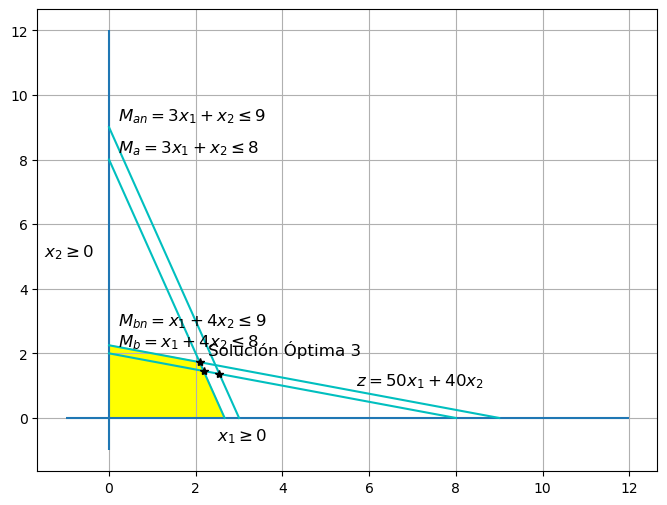

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()


# Dibujamos las restricciones
ax.hlines(0, -1, 12) #Se traza X
ax.vlines(0, -1, 12) #Se traza y
ax.plot(ma1, ma2, linestyle="-", color="c") #Se dibuja la linea de la función MA igualada a 0
ax.plot(man1, man2, linestyle="-", color="c") #Se dibuja la linea de la función MAN igualada a 0
ax.plot(mbn1, mbn2, linestyle="-", color="c") #Se dibuja la linea de la función MBN igualada a 0
ax.plot(mb1, mb2, color="c") #Se dibuja la linea de la función MB igualada a 0
ax.text((ma2[0] + .2), (ma2[1] + .2), fma, size=12)
ax.text((man2[0] + .2), (man2[1] + .2), fman, size=12) 
ax.text((mb2[0] + .2), (mb2[1] + .2), fmb, size=12)
ax.text((mbn2[0] + .2), (mbn2[1] + .6), fmbn, size=12)
ax.text(-1.5, 5, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Se ilumina el área de posibles soluciones
feasible_set = Polygon(np.array([[0, 0],
                                 [mbn2[0], mbn2[1]],
                                 [x2[0], x2[1]], 
                                 [ma1[0], ma1[1]]]), 
                       color="yellow")
ax.add_patch(feasible_set)

# Se dibujan trazan las posibles soluciones para cada 1 unidad
ax.text(5.7, 1, fz, size=12)
#ax.arrow(-1.6, 0, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="green")

# Dibujamos la solución optima
ax.plot(x[0], x[1], "*", color="black")
ax.plot(x1[0], x1[1], "*", color="black")
ax.plot(x2[0], x2[1], "*", color="black")
ax.text((x2[0] + .2), (x2[1] + .2), "Solución Óptima 3", size=12)

plt.show()

In [33]:
#Se calcula Z dentro de los puntos óptimos


za1 = fun_z(mbn2[0], z[0], mbn2[1], z[1])
zb2 = fun_z(x2[0], z[0], x2[1], z[1])
zc = fun_z(ma1[0], z[0], ma1[1], z[1])

print(f"ZA1 = {za1}") #Se sustituyen los valores óptimos del gráfico anterior en Y
print(f"ZB2 = {zb2}") #Se sustituye la solución de la ecuación
print(f"ZC = {zc}") #Se sustituyen los valores óptimos del gráfico anterior en X

ZA1 = 90.0
ZB2 = 173.63636363636363
ZC = 133.33333333333331


In [34]:
#Se calcula la utilidad extra por hora

def pd(a,b,c,d):
    return((a - b) / (c - d))

pdma = pd(zb1,zb,bn[0],bn[1])
pdmb = pd(zb2,zb,bn[0],bn[1])

print(f"PDMA = ${pdma}/h")
print(f"PDMB = ${pdmb}/h")

PDMA = $14.545454545454533/h
PDMB = $6.3636363636363455/h


In [35]:
#MA mínimo y máximo

mamin = fun_z(A[0,0], mb2[0], A[0,1], mb2[1])
mamax =  fun_z(A[0,0], mb1[0], A[0,1], mb1[1])

print(f"{mamin} <= MA <= {mamax}") 

2.0 <= MA <= 24.0


In [36]:
#MB mínimo y máximo

mbmin = fun_z(A[1,0], ma1[0], A[1,1], ma1[1])
mbmax = fun_z(A[1,0], ma2[0], A[1,1], ma2[1])

print(f"{mbmin} <= MB <= {mbmax}") 

2.6666666666666665 <= MB <= 32.0


## Inciso C

In [39]:
#Se calcula C
cb = A[1,0] / A[1,1]
cc = z[0] / z[1]
ca = A[0,0] / A[0,1]

print(f"{cb} <= {cc} <= {ca}") 

0.25 <= 1.25 <= 3.0


In [40]:
#Se encuentra una C que al dividirla por el otro de 2

40 / z[1] #Se estima el valor que al dividirlo por c2 nos de el máximo

1.0

In [41]:
c1 = 40
c2 = z[1]

In [42]:
zc = fun_z(x[0], c1, x[1], c2)
zc

145.45454545454547

In [50]:
#Se plantea la formula para 8 horas

cx1 = c2 * cb
cx2 = c2 * ca

print(f"{cx1} <= c1 <= {cx2}") 

10.0 <= c1 <= 120.0


In [51]:
fun_z(x[0], cx1, x[1], cx2)

196.3636363636364

In [52]:
#Se calcula C
cb1 = A[1,1] / A[1,0]
cc1 = z[1] / z[0]
ca1 = A[0,1] / A[0,0]

print(f"{ca1} <= {cc1} <= {cb1}")

0.3333333333333333 <= 0.8 <= 4.0


In [53]:
#Se encuentra una C que al dividirla por el otro de 2

z[0] / 30 #Se estima el valor que al dividirlo por c2 nos de el máximo

1.6666666666666667

In [54]:
c11 = 30
c2 = z[1]

In [55]:
#Se plantea la formula para 8 horas

cx1 = c11 * cb1
cx2 = c11 * ca1

print(f"{cx1} <= c2 <= {cx2}") 

120.0 <= c2 <= 10.0


In [56]:
fun_z(x[0], cx1, x[1], cx2)

276.3636363636364